## Decision Tree Regression

## Step1: Data Gathering

In [82]:
from warnings import filterwarnings
filterwarnings('ignore')

In [83]:
import pandas as pd

In [84]:
path = r"C:\Users\Akshay\OneDrive\Desktop\datasets\train.csv"
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Step2:Perform basic data quality checks

In [85]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [86]:
df.shape

(2000, 21)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [88]:
# missing data 
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [89]:
#duplicated rows
df.duplicated().sum()

np.int64(0)

Drop Duplicates

In [90]:
df =df.drop_duplicates()

In [91]:
df.duplicated().sum()

np.int64(0)

## Seperate X and Y features

In [92]:
X =df.drop(columns='price_range')
Y =df[['price_range']]

In [93]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [94]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


## Step3 : Data preprocessing and Data cleaning

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [96]:
pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [97]:
pre

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [98]:
X_pre = pre.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Step4: Split the data into training and testing

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.5,random_state=21)

In [101]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1733,-0.171903,1.010051,0.708200,0.981177,-0.992890,0.957886,-0.719165,1.381165,-0.233083,-1.101971,-1.470690,0.186833,-1.003296,0.752251,0.164641,-1.324131,0.730240,0.559641,-1.006018,0.986097
1769,-1.150715,1.010051,-1.130485,0.981177,-0.992890,-1.043966,1.706256,-0.699686,-0.995993,1.084046,0.013773,0.687205,1.128198,-1.051410,1.114266,-0.405712,-0.368140,0.559641,-1.006018,0.986097
640,-1.453463,-0.990050,-1.253064,-1.019184,-0.992890,-1.043966,-0.994781,1.034357,-0.798202,0.209639,-1.305750,-0.732770,-1.167613,-0.432669,1.351672,-1.324131,-0.368140,-1.786861,-1.006018,-1.014099
1451,-1.610528,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.105027,-0.006069,-0.543898,-0.227564,-1.140810,-1.097906,0.938423,0.190682,1.351672,1.431127,1.645557,0.559641,-1.006018,0.986097
1880,1.095999,-0.990050,0.095305,-1.019184,3.154233,0.957886,-1.656260,1.034357,1.349249,0.209639,1.663176,-0.701215,-0.822778,0.366806,-0.547577,-0.176107,-1.649584,0.559641,-1.006018,0.986097


In [102]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
541,-1.014136,-0.990050,-0.395011,0.981177,-0.762495,0.957886,0.328176,0.340740,1.010178,-0.227564,-0.481048,1.309289,1.304086,0.935753,-1.497202,-1.094526,0.181050,0.559641,0.994018,0.986097
1211,-1.196241,1.010051,0.095305,-1.019184,0.619880,0.957886,-1.656260,-0.352878,1.151457,1.521249,-0.151168,1.275480,0.292726,-1.511547,-0.547577,0.053498,-1.283457,0.559641,0.994018,0.986097
1862,-0.445060,-0.990050,1.443675,-1.019184,-0.301703,-1.043966,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,0.559641,-1.006018,-1.014099
1094,-1.253148,1.010051,-0.027274,-1.019184,-0.992890,-1.043966,-1.656260,1.727974,-1.448088,-0.664768,-1.305750,-0.843213,-0.885265,-1.598226,-1.734608,-0.864922,-0.551204,0.559641,0.994018,0.986097
465,0.784145,1.010051,0.095305,-1.019184,0.159088,0.957886,0.548669,1.034357,-0.628666,-0.664768,0.013773,-0.834197,-0.901466,1.408799,0.402047,0.971917,-0.368140,0.559641,-1.006018,-1.014099


In [103]:
ytrain.head()

,price_range
1733,2
1769,0
640,0
1451,1
1880,2


In [104]:
ytest.head()

,price_range
541,3
1211,0
1862,0
1094,0
465,3


## Build the Model

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
model = DecisionTreeRegressor(
    max_depth = 3,
    min_samples_leaf = 4,
    min_samples_split=6,
    criterion='squared_error'
)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=6)

In [107]:
model.score(xtrain,ytrain)

0.8578804226704018

In [108]:
model.score(xtest,ytest)

0.8496057161444839

## Hyperparameter tuning with GridsearchCV

In [109]:
params = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'criterion':['squared_error','absolute_error']
}

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
base_model = DecisionTreeRegressor()
gscv = GridSearchCV(estimator=base_model,param_grid=params,cv=3,scoring='r2')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='r2')

In [112]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 7}

In [113]:
gscv.best_score_

np.float64(0.885484948623986)

In [114]:
best_dtr = gscv.best_estimator_

In [115]:
best_dtr.score(xtrain,ytrain)

0.9634594541069603

In [116]:
best_dtr.score(xtest,ytest)

0.8769032422387417

## Step6: Model Evaluation

In [117]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [118]:
ypred_test = best_dtr.predict(xtest)

In [119]:
mse = mean_squared_error(ytest,ypred_test)
mae = mean_absolute_error(ytest,ypred_test)
r2 = r2_score(ytest,ypred_test)
rmse= mse**(1/2)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"RMSE is: {rmse}")
print(f"R2 score is:{r2*100}%")

MSE is :0.15354154027780378
MAE is :0.20009801587301587
RMSE is: 0.39184377024243194
R2 score is:87.69032422387417%


## Step7: Plot the decision tree

In [120]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

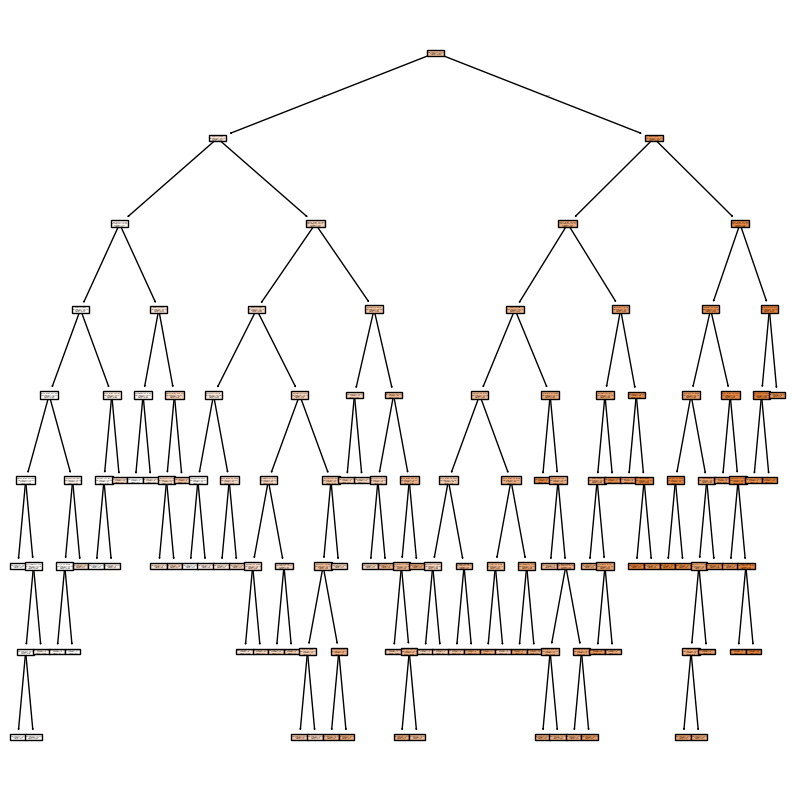

In [121]:
plt.figure(figsize=(10,10))
plot_tree(best_dtr,feature_names=xtrain.columns,filled=True)
plt.show()

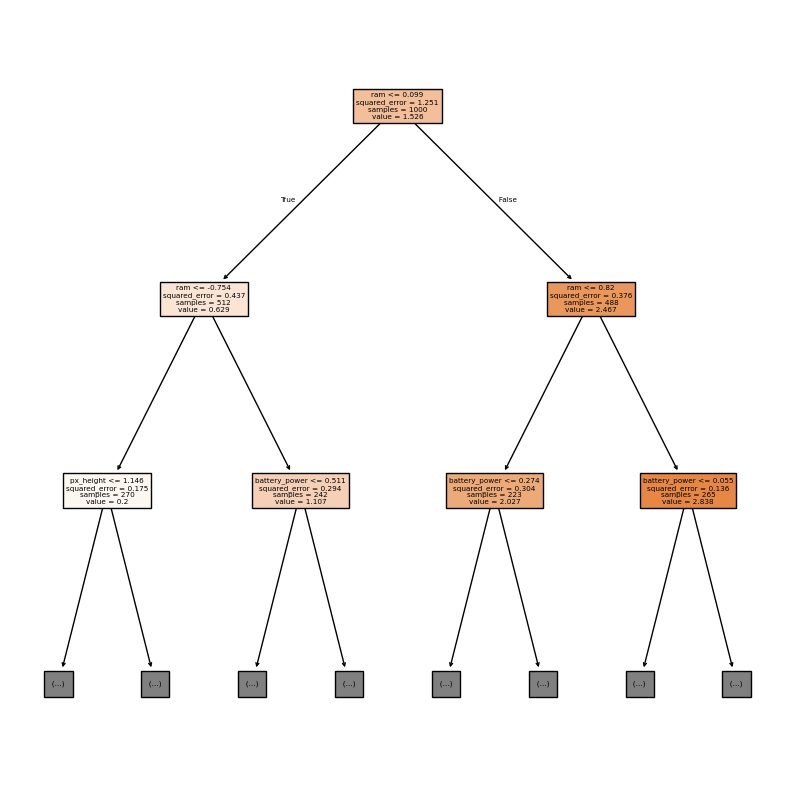

In [122]:
plt.figure(figsize=(10,10))
plot_tree(best_dtr,feature_names=xtrain.columns,max_depth=2,filled=True)
plt.show()

In [123]:
best_dtr.feature_importances_

array([4.38520908e-02, 0.00000000e+00, 8.28005879e-04, 0.00000000e+00,
       1.31331571e-04, 8.29462551e-05, 1.22386386e-03, 0.00000000e+00,
       6.97653384e-03, 1.25057431e-03, 8.47639853e-04, 2.69811744e-02,
       2.88278386e-02, 8.86888401e-01, 5.61269659e-04, 0.00000000e+00,
       1.54833010e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [124]:
xtrain.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [125]:
imp_cols = pd.Series(best_dtr.feature_importances_,index=xtrain.columns)
imp_cols

battery_power    0.043852
blue             0.000000
clock_speed      0.000828
dual_sim         0.000000
fc               0.000131
four_g           0.000083
int_memory       0.001224
m_dep            0.000000
mobile_wt        0.006977
n_cores          0.001251
pc               0.000848
px_height        0.026981
px_width         0.028828
ram              0.886888
sc_h             0.000561
sc_w             0.000000
talk_time        0.001548
three_g          0.000000
touch_screen     0.000000
wifi             0.000000
dtype: float64

## Step8: Out of sample predictions

In [126]:
path2 = r"C:\Users\Akshay\OneDrive\Desktop\datasets\train.csv"
xnew= pd.read_csv(path2)
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [127]:
xnew_pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [128]:
xnew_pre

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [130]:
PowerEnergy_predicted = best_dtr.predict(xnew_pre)
PowerEnergy_predicted = PowerEnergy_predicted.round(2)
PowerEnergy_predicted

TypeError: float() argument must be a string or a real number, not 'SimpleImputer'